<a href="https://colab.research.google.com/github/dhruvpathak1/machine_learning/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

data = pd.read_csv("https://raw.githubusercontent.com/dhruvpathak1/machine_learning/main/summary_of_weather.csv")

In [4]:
data.shape

(821, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PoorWeather  189 non-null    float64
 1   YR           821 non-null    int64  
 2   MO           821 non-null    int64  
 3   DA           821 non-null    int64  
 4   PRCP         821 non-null    object 
 5   DR           0 non-null      float64
 6   SPD          0 non-null      float64
 7   MAX          821 non-null    int64  
 8   MIN          821 non-null    int64  
 9   MEA          821 non-null    int64  
 10  SNF          821 non-null    int64  
 11  SND          0 non-null      float64
 12  FT           0 non-null      float64
 13  FB           0 non-null      float64
 14  FTI          0 non-null      float64
 15  ITH          0 non-null      float64
 16  PGT          0 non-null      float64
 17  TSHDSBRSGF   189 non-null    float64
 18  SD3          0 non-null      float64
 19  RHX     

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
X = data[['MIN']]
Y = data['MAX']
# fit the linear model using MIN
lm.fit(X,Y)
# training data is passed to fit method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:10]

array([86.15332371, 85.16045518, 86.15332371, 86.15332371, 85.16045518,
       85.16045518, 87.14619224, 86.15332371, 87.14619224, 85.16045518])

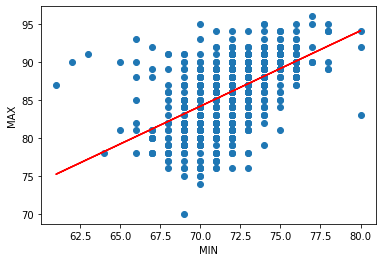

In [9]:
# plot regression model
plt.scatter(data['MIN'],Y)
# X,Y
plt.plot(data['MIN'],Yhat,color='red')
plt.xlabel('MIN')
plt.ylabel('MAX')
plt.show()

In [10]:
print(lm.intercept_)
print(lm.coef_)

14.666789713361737
[0.99286853]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(Y, Yhat)
r2 = r2_score(Y, Yhat)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  14.024860190910182
R2 score:  0.2981812008572319


In [16]:
X=X.iloc[:,0] 

In [17]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.1961174307484614 0.020012222669674614


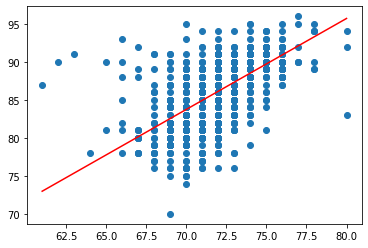

In [18]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()